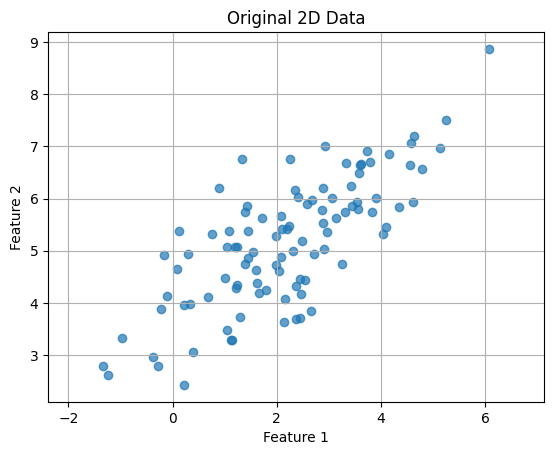

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()


In [3]:
#2nd question - Center the data
means = X.mean(axis=0)
X_centered = X - means

# Output
print("Feature means after centering:", X_centered.mean(axis=0))


Feature means after centering: [6.21724894e-17 4.35207426e-16]


In [4]:
#3rd question - Compute the covariance matrix.

cov_mat = np.cov(X_centered, rowvar=False)
print("Covariance matrix:\n", cov_mat)

Covariance matrix:
 [[2.28165958 1.40082016]
 [1.40082016 1.50064765]]


In [5]:
#4th question - Calculate the eigenvalues and eigenvectors.

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

print("Eigenvalues:", eig_vals)
print("Eigenvectors (columns):\n", eig_vecs)

Eigenvalues: [3.34538606 0.43692116]
Eigenvectors (columns):
 [[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


In [19]:
#5th question - Project the data onto the first principal component.

pc1     = eig_vecs[:, 0]
X_proj1 = X_centered.dot(pc1)
print("Shape of projected data:", X_proj1.shape)
print("First few projected values:", X_proj1[:5])

Shape of projected data: (100,)
First few projected values: [-1.30603963 -1.64324718  0.25564442 -3.62587129  0.75127862]


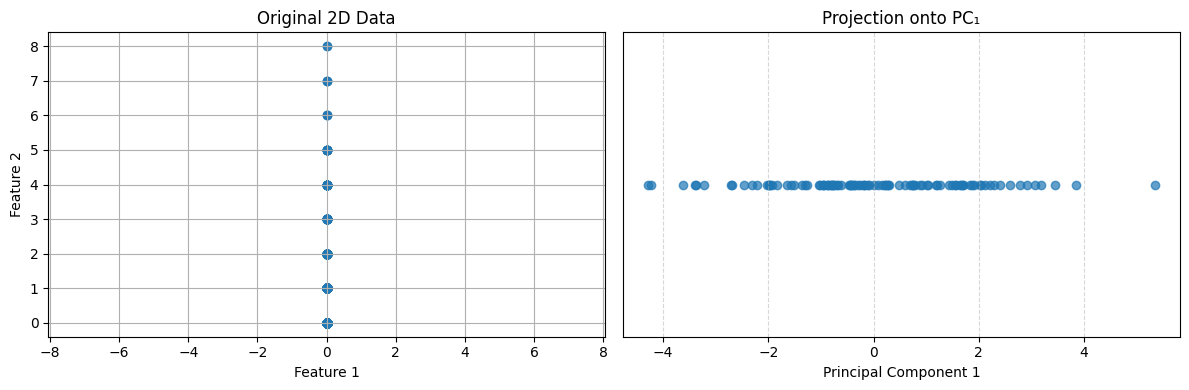

In [15]:
#6th question - Plot the 1D projection and compare it with the original.

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Original 2D data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)

# 1D projection onto PC1
plt.subplot(1, 2, 2)
plt.scatter(X_proj1, np.zeros_like(X_proj1), alpha=0.7)
plt.title("Projection onto PC₁")
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

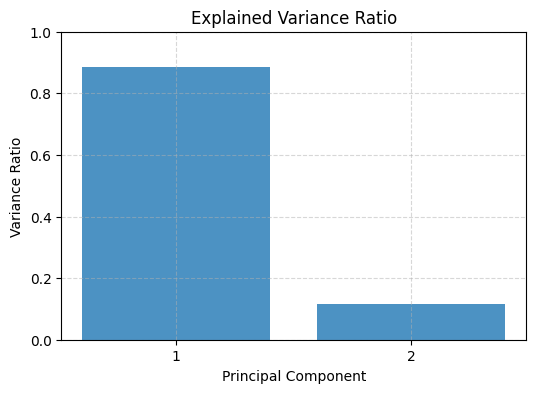

Explained variance ratios: [0.8844829 0.1155171]


In [16]:
#7th question - Plot the amount of variance explained by each component.

import matplotlib.pyplot as plt

explained_variance = eig_vals / eig_vals.sum()

plt.figure(figsize=(6,4))
plt.bar([1, 2], explained_variance, alpha=0.8)
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.xticks([1, 2])
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Explained variance ratios:", explained_variance)

In [9]:
# Use t-SNE to visualize how it separates points from different classes in 2D space.

# Inspect the shape of X and y. What do the 64 features represent?

from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Each of the 64 features is the intensity of one pixel in the 8×8 grayscale image.")

Shape of X: (1797, 64)
Shape of y: (1797,)
Each of the 64 features is the intensity of one pixel in the 8×8 grayscale image.


In [10]:
#Question 2 Apply TSNE from sklearn.manifold with n_components=2.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

print("t-SNE embedding complete. Shape:", X_tsne.shape)

t-SNE embedding complete. Shape: (1797, 2)


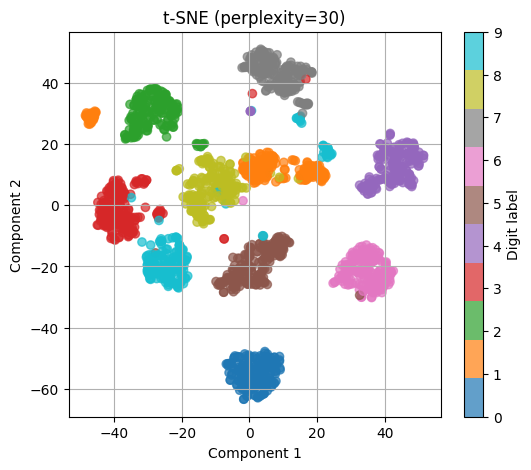

In [11]:
#Question 3 - Visualize the 2D t-SNE embedding using matplotlib.pyplot.scatter, color-coded by digit labels.

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=y, cmap='tab10', alpha=0.7
)
plt.title("t-SNE (perplexity=30)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter, label="Digit label")
plt.grid(True)
#plt.show()

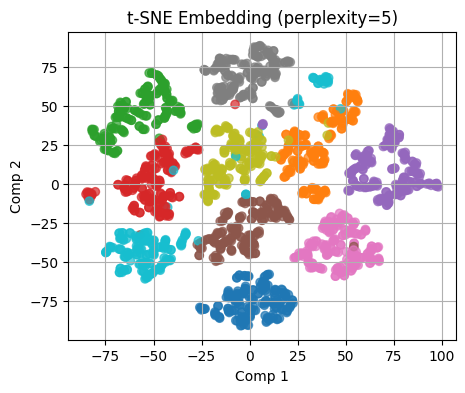

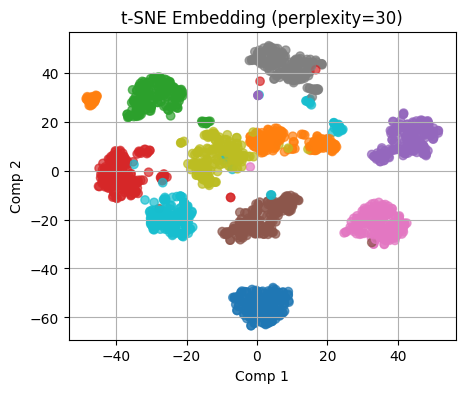

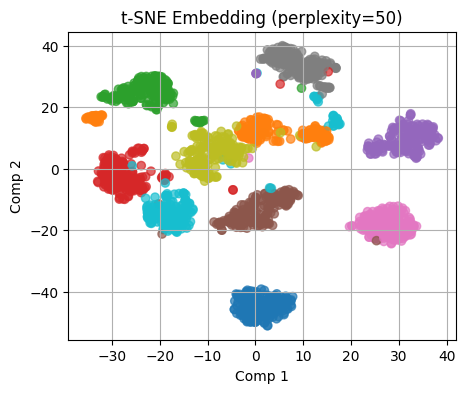

In [12]:
#Question 4 - Try different perplexity values (e.g., 5, 30, 50) and compare how clusters change.

perplexities = [5, 30, 50]

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_p = tsne.fit_transform(X)

    plt.figure(figsize=(5,4))
    plt.scatter(X_p[:,0], X_p[:,1], c=y, cmap='tab10', alpha=0.7)
    plt.title(f"t-SNE Embedding (perplexity={p})")
    plt.xlabel("Comp 1"); plt.ylabel("Comp 2")
    plt.grid(True)
    plt.show()

# compare how clusters change. 
# ——————————————————————————————————————————————
# When we use a very low perplexity like 5, t-SNE only looks at each point’s closest neighbors, so it makes lots of tiny, tight blobs that end up floating apart and breaking the big picture. 
# If we use perplexity up to around 30, it finds a happy middle ground that means clusters stay neat and separate, but they also hold together so you can see how they all fit. 
# Increase perplexity even higher—to 50—and it spreads its view wider, 
# smoothing out those little groups and merging similar ones; the result is a cleaner, more connected map, but we lose some of the fine details.
# ——————————————————————————————————————————————
